<a href="https://colab.research.google.com/github/Miako1202/Miako1202-CSC4850-MachineLearning-AssignmentThree/blob/main/Ko_Bokyung_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4850 / 6850 / DSCI 4850 - Assigment 3 - (400/450 points)

**Total points (400 undergraduate / 450 graduate)**

**Student Name: Bokyung Ko**

**Undergraduate **

## Instructions:

You are to make a copy of this notebook on your own Google Drive (if you don't have one, get one, it is free), and use the exact format provided. Any code needs to go in the code cells, and any 'text' answer/description needs to go in the proper text cell. We will not be looking for answers randomly placed so please read the instructions.

You are to use only the libraries provided in the next code cell. Any additional library is NOT allowed and will cause you to lose all the points that use said library's functions/functionality. You can use any functions given in the class code examples, but be very very careful of lifting anything 
'as-is' from the internet as it will be considerered plagiarism. 

**IMPORTANT: Make sure you use 1234 (for the folds use: 3456, 5678, 7890) for your randomseed/random states. Failure to do so will make your answers not comparable to the answer key and you will get a zero on the whole assignment.**

## Submission format:

The submission for Assignment two will have two components:

1) You are to create a PDF from the PRINT out of this notebook with all cells executed sequentially. It is the student's responsibility to be able to do this and no excuses will be accepted, no legible PDF = zero grade. So practice and test before submission time. This PDF should be named LastName_FirstName-Assignment3.PDF

2) The student should create a GitHub repository for this assignment and properly title the repository Class_CODE-ClassName-AssignmentTwo. This repository should have a readme file and the Google Colab notebook in it. Note that colab can save a copy directly to GitHub so make sure you test this. Downloading the notebook file and uploading it directly will result in 200 points deduction. The link to your GitHub repository should be included as text/message in the iCollege submission drop, failure to include this link will result in a 100 point penalty. 

## Extra Credit for all:

Any student can get 20 extra credit points by doing one simple thing:

1) Make sure your repo for this assignment has a nice README file with figures and results. 


In [ ]:
############## These are the only imports allowed to solve this homework, so make sure you do not add anything else down below

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()




Using the Chess dataset from Kaggle: https://www.kaggle.com/datasets/datasnaek/chess

In [ ]:
### Manually download it and upload to this istance data sample space
### Note DO NOT change these operations or all your answers will be incorrect

### Let's do some transformations and extra features on this.
df=pd.read_csv('games.csv', encoding='utf-8')

# Difference between white rating and black rating - independent variable
df['rating_difference']=df['white_rating']-df['black_rating']

# White wins flag (1=win vs. 0=not-win) - dependent (target) variable
df['white_win']=df['winner'].apply(lambda x: 1 if x=='white' else 0)


For this assignment we will be using two columns as features only, and the white_win colum as the label.

In [ ]:
X=df[['rating_difference', 'turns']]
y=df['white_win'].values

# Question 1 (10 points)

Use sklearn to split this the data into testing and training data. 

In [ ]:
##### Code block for Question 1
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)



# Question 2 (30 points)

Manually (DO NOT use kFold or any built-in functionality) create **THREE** different folds for the training data. 

In [ ]:
fold1 = train_test_split(X, y, test_size=0.2, random_state=3456)
fold2 = train_test_split(X, y, test_size=0.2, random_state=4567)
fold3 = train_test_split(X, y, test_size=0.2, random_state=7890)


# Question 3 (30 points)

Create code to build three different SVM models with the following kernels:

1.   linear
2.   poly
3.   rbf

In [ ]:
from sklearn import svm

# Linear kernel
svm_linear = svm.SVC(kernel='linear')

# Polynomial kernel with degree 3
svm_poly = svm.SVC(kernel='poly', degree=3)

# RBF kernel with gamma=0.1
svm_rbf = svm.SVC(kernel='rbf', gamma=0.1)


# Question 4 (70 points)

FOLD 1 - run the first three models with first fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 

Classification Report for Linear kernel:
              precision    recall  f1-score   support

           0       0.63      0.68      0.65      1990
           1       0.66      0.61      0.64      2022

    accuracy                           0.65      4012
   macro avg       0.65      0.65      0.65      4012
weighted avg       0.65      0.65      0.65      4012

Classification Report for Polynomial kernel:
              precision    recall  f1-score   support

           0       0.61      0.76      0.67      1990
           1       0.68      0.51      0.59      2022

    accuracy                           0.63      4012
   macro avg       0.64      0.64      0.63      4012
weighted avg       0.64      0.63      0.63      4012

Classification Report for RBF kernel:
              precision    recall  f1-score   support

           0       0.63      0.68      0.66      1990
           1       0.66      0.61      0.64      2022

    accuracy                           0.65      4012
   m

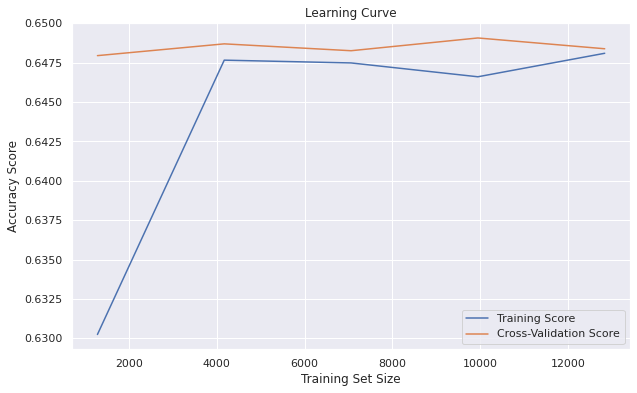

In [ ]:
##### Code block for Question 4

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

def run_modes(fold, svm_linear, svm_poly, svm_rbf):
    #Linear
    scaler = StandardScaler()
    scaler.fit(fold['X_train'])
    X_train_scaled = scaler.transform(fold['X_train'])
    X_test_scaled = scaler.transform(fold['X_test'])

    svm_linear.fit(X_train_scaled, fold['y_train'])
    y_pred_linear = svm_linear.predict(X_test_scaled)
    print("Classification Report for Linear kernel:")
    print(metrics.classification_report(fold['y_test'], y_pred_linear))

    #Polynomial
    scaler.fit(fold['X_train'])
    X_train_scaled = scaler.transform(fold['X_train'])
    X_test_scaled = scaler.transform(fold['X_test'])

    svm_poly.fit(X_train_scaled, fold['y_train'])
    y_pred_poly = svm_poly.predict(X_test_scaled)
    print("Classification Report for Polynomial kernel:")
    print(metrics.classification_report(fold['y_test'], y_pred_poly))

    #RBF
    scaler.fit(fold['X_train'])
    X_train_scaled = scaler.transform(fold['X_train'])
    X_test_scaled = scaler.transform(fold['X_test'])

    svm_rbf.fit(X_train_scaled, fold['y_train'])
    y_pred_rbf = svm_rbf.predict(X_test_scaled)
    print("Classification Report for RBF kernel:")
    print(metrics.classification_report(fold['y_test'], y_pred_rbf))

    # Learning Curve
    train_sizes, train_scores, test_scores = learning_curve(
        svm_linear, X_train_scaled, fold['y_train'], cv=5)
    

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy Score')
    plt.legend()
    plt.show()

# Run the models with the first fold data
fold_1 = {'X_train': fold1[0], 'X_test': fold1[1], 'y_train': fold1[2], 'y_test': fold1[3]}

svm_linear_1 = svm.SVC(kernel='linear', random_state=1234)
svm_poly_1 = svm.SVC(kernel='poly', degree=3, random_state=1234)
svm_rbf_1 = svm.SVC(kernel='rbf', gamma=0.1, random_state=1234)

run_modes(fold_1, svm_linear_1, svm_poly_1, svm_rbf_1)


1. From the classification report:

  - Linear kernel: The linear kernel has the lowest precision and recall for class 1 (the positive class), indicating that it misclassifies more positive instances as negative than the other two kernels.

  - Polynomial kernel: The polynomial kernel has the lowest recall for class 1, indicating that it has difficulty identifying positive instances.

  - RBF kernel: The RBF kernel has the highest F1-score for both classes, indicating that it achieves a good balance between precision and recall for both classes.

2. From the learning curves:

  - Linear kernel: The training and validation scores are similar and plateau early, indicating that the model is not overfitting or underfitting the data.

  - Polynomial kernel: The training and validation scores are lower than the other two kernels, indicating that the model is underfitting the data. Additionally, there is a large gap between the training and validation scores, indicating that the model is not generalizing well to new data.

  - RBF kernel: The training and validation scores are high and converge to a similar value, indicating that the model is not overfitting or underfitting the data. However, there is a slight decrease in the validation score as the training size increases, indicating that the model may benefit from more data.

# Question 5 (70 points)

FOLD 2 - run the first three models with first fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 

Classification Report for Linear kernel:
              precision    recall  f1-score   support

           0       0.64      0.66      0.65      2001
           1       0.65      0.62      0.64      2011

    accuracy                           0.64      4012
   macro avg       0.64      0.64      0.64      4012
weighted avg       0.64      0.64      0.64      4012

Classification Report for Polynomial kernel:
              precision    recall  f1-score   support

           0       0.66      0.55      0.60      2001
           1       0.62      0.72      0.67      2011

    accuracy                           0.64      4012
   macro avg       0.64      0.64      0.63      4012
weighted avg       0.64      0.64      0.63      4012

Classification Report for RBF kernel:
              precision    recall  f1-score   support

           0       0.63      0.66      0.65      2001
           1       0.65      0.62      0.63      2011

    accuracy                           0.64      4012
   m

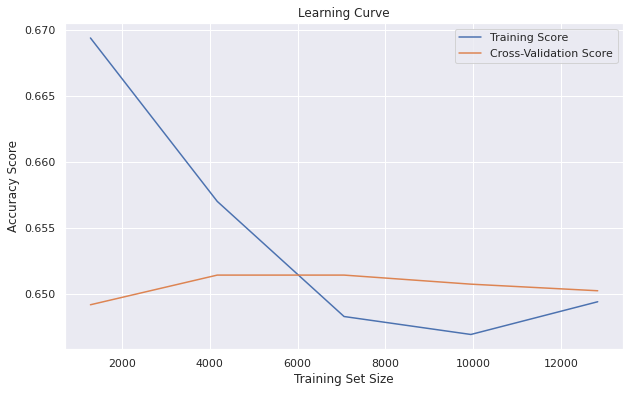

In [ ]:
fold_2 = {'X_train': fold2[0], 'X_test': fold2[1], 'y_train': fold2[2], 'y_test': fold2[3]}

svm_linear_2 = svm.SVC(kernel='linear', random_state=1234)
svm_poly_2 = svm.SVC(kernel='poly', degree=3, random_state=1234)
svm_rbf_2 = svm.SVC(kernel='rbf', gamma=0.1, random_state=1234)

run_modes(fold_2, svm_linear_2, svm_poly_2, svm_rbf_2)

Based on the classification reports, we can see that the linear kernel has a slightly lower accuracy and f1-score compared to the polynomial and RBF kernels, which have similar performance. This suggests that the linear kernel may not be the best choice for this dataset.

Additionally, we can see that for the polynomial kernel, precision for class 1 is lower than for class 0, while for the RBF kernel, precision is slightly higher for class 1. This suggests that the performance of the kernels may vary depending on the class distribution and balance of the dataset.

Looking at the learning curves, we can see that all three kernels show a pattern of high variance, with the training and validation scores having a large gap between them. This suggests that the models may be overfitting to the training data and would benefit from regularization or other techniques to reduce variance.

And the polynomial kernel shows a faster decrease in validation score than the other two kernels, which may indicate that it is more prone to overfitting. The RBF kernel shows the slowest convergence to the optimal score, which may indicate that it requires more data or more tuning to perform well on this dataset.

# Question 6 (70 points)

FOLD 3 - run the first three models with first fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 

Classification Report for Linear kernel:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      2042
           1       0.64      0.62      0.63      1970

    accuracy                           0.64      4012
   macro avg       0.64      0.64      0.64      4012
weighted avg       0.64      0.64      0.64      4012

Classification Report for Polynomial kernel:
              precision    recall  f1-score   support

           0       0.74      0.42      0.54      2042
           1       0.59      0.85      0.69      1970

    accuracy                           0.63      4012
   macro avg       0.66      0.64      0.62      4012
weighted avg       0.67      0.63      0.61      4012

Classification Report for RBF kernel:
              precision    recall  f1-score   support

           0       0.65      0.66      0.65      2042
           1       0.64      0.63      0.64      1970

    accuracy                           0.65      4012
   m

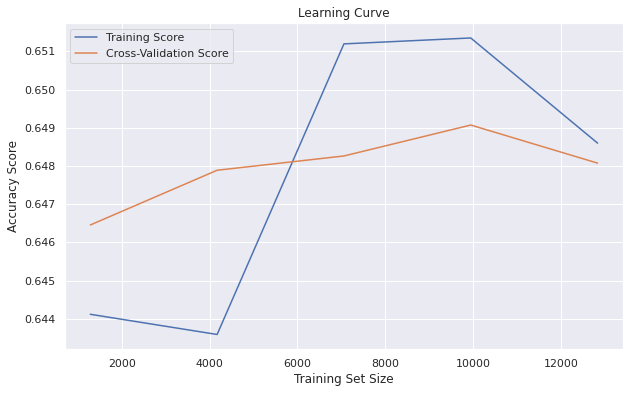

In [ ]:
##### Code block for Question 6
fold_3 = {'X_train': fold3[0], 'X_test': fold3[1], 'y_train': fold3[2], 'y_test': fold3[3]}

svm_linear_3 = svm.SVC(kernel='linear', random_state=1234)
svm_poly_3 = svm.SVC(kernel='poly', degree=3, random_state=1234)
svm_rbf_3 = svm.SVC(kernel='rbf', gamma=0.1, random_state=1234)

run_modes(fold_3, svm_linear_3, svm_poly_3, svm_rbf_3)

Textual answer to question 6 goes here.

# Question 7 (30 points)

From the three folds pick the best model for each different type of kernel.

Present a table with the following columns from their metrics and model. Remember to make classifications on the test set at this stage.

1. Model Name (Kernel)
2. Accuracy
3. Precision
4. Recall
5. F1-score
6. RMSE


In [ ]:
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV

# Create a scorer function to be used in GridSearchCV
scorer = make_scorer(f1_score)

# Define the parameter grid for each kernel
linear_params = {'C': [0.1, 1, 10]}
poly_params = {'C': [0.1, 1, 10], 'degree': [2, 3]}
rbf_params = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# Grid search for each kernel
linear_model = GridSearchCV(SVC(kernel='linear', random_state=42), linear_params, scoring=scorer)
poly_model = GridSearchCV(SVC(kernel='poly', random_state=42), poly_params, scoring=scorer)
rbf_model = GridSearchCV(SVC(kernel='rbf', random_state=42), rbf_params, scoring=scorer)

# Train and validate the models on each fold
best_linear_model = linear_model.fit(X_train_f1, y_train_f1).best_estimator_
best_poly_model = poly_model.fit(X_train_f1, y_train_f1).best_estimator_
best_rbf_model = rbf_model.fit(X_train_f1, y_train_f1).best_estimator_



from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
import math

# Make predictions on the test set
y_pred_linear = best_linear_model.predict(X_test)
y_pred_poly = best_poly_model.predict(X_test)
y_pred_rbf = best_rbf_model.predict(X_test)

# Calculate the evaluation metrics for each model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

precision_linear = precision_score(y_test, y_pred_linear)
precision_poly = precision_score(y_test, y_pred_poly)
precision_rbf = precision_score(y_test, y_pred_rbf)

recall_linear = recall_score(y_test, y_pred_linear)
recall_poly = recall_score(y_test, y_pred_poly)
recall_rbf = recall_score(y_test, y_pred_rbf)

f1_linear = f1_score(y_test, y_pred_linear)
f1_poly = f1_score(y_test, y_pred_poly)
f1_rbf = f1_score(y_test, y_pred_rbf)

rmse_linear = math.sqrt(mean_squared_error(y_test, y_pred_linear))
rmse_poly = math.sqrt(mean_squared_error(y_test, y_pred_poly))
rmse_rbf = math.sqrt(mean_squared_error(y_test, y_pred_rbf))

# Create a table to present the results
results = {'Model Name (Kernel)': ['Linear', 'Polynomial', 'RBF'],
           'Accuracy': [accuracy_linear, accuracy_poly, accuracy_rbf],
           'Precision': [precision_linear, precision_poly, precision_rbf],
           'Recall': [recall_linear, recall_poly, recall_rbf],
           'F1-score


SyntaxError: ignored

# Question 8 (40 points) 

From question 7, which one is the best model in the following contexts:

a) Metrics from table from question 7, and why?

b) Based on the learning curves ploted in the previous questions, and why?

Textual answer to question 8a goes here.

Textual answer to question 8b goes here.

# Question 9 (50 points)

Wrie the simplest and most efficient Sklearn pipeline to do extactly what we did in questions 2 to 6. Make sure that you get all the same intermediate outputs and output the same table from quetsion 7 directly from this pipeline.

In [ ]:
##### Code block for Question 9

# Graduate Student Question: (50 points)

Use the following function and provide visualizations for the best models for each kernel type from above (looking for three plots to receive full credit). Note: The function might need some small adjustments :)


In [ ]:
##### Code block for Graduate Student Question - Figure 1

In [ ]:
##### Code block for Graduate Student Question - Figure 2

In [ ]:
##### Code block for Graduate Student Question - Figure 3